In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2024,"62,382.30","61,167.90","63,100.00","60,784.00",47.75K,2.01%
1,2/29/2024,"61,153.10","62,438.20","63,659.80","60,520.60",78.40K,-2.08%
2,2/28/2024,"62,451.10","57,040.00","63,890.00","56,698.00",118.76K,9.49%
3,2/27/2024,"57,037.30","54,476.50","57,542.40","54,452.90",67.20K,4.69%
4,2/26/2024,"54,484.60","51,728.80","54,891.10","50,925.90",51.25K,5.34%
...,...,...,...,...,...,...,...
1823,3/5/2019,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%
1824,3/4/2019,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1825,3/3/2019,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1826,3/2/2019,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%


In [84]:
#convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
#set index column is Date
df.set_index('Date',inplace=True)

In [85]:
cols = ['Price', 'Open', 'High', 'Low']
df[cols] = df[cols].replace(',', '', regex=True).astype(float)

In [86]:
#convert Vol. column
def convert_vol (vol):
    if vol[-1] == 'K':
        return int(float(vol[:-1]) * 1000)
    elif vol[-1] == 'M':
        return int(float(vol[:-1]) * 1000000)
    elif vol[-1] == 'B':
        return int(float(vol[:-1]) * 1000000000)
    else:
        return int(vol)

df["Vol."] = df["Vol."].apply(convert_vol)

In [87]:
# convert Change % column
def convert_change(change):
    new_change = float(change.strip('%')) / 100
    return new_change

df["Change %"] = df["Change %"].apply(convert_change)

In [88]:
target = 'Price'
features = [ 'Open', 'High', 'Low', 'Vol.']

<Axes: xlabel='Date', ylabel='Price'>

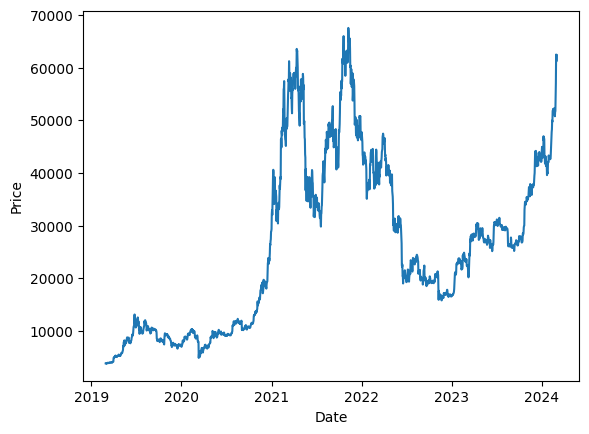

In [89]:
sns.lineplot(data = df, x = df.index, y = df['Price'])

In [91]:
#7:2:1
train_data = df[:round(len(df)*70/100)]
test_data = df[round(len(df)*70/100):round(len(df)*90/100)]
val_data = df[round(len(df)*90/100):]

In [92]:
# Create a Random Forest model
model = RandomForestRegressor()
# Train the model
model.fit(train_data[features], train_data[target])

RandomForestRegressor()

In [95]:
train_predictions = model.predict(train_data[features])
test_predictions = model.predict(test_data[features])
val_predictions = model.predict(val_data[features])

In [96]:
last_data = df.index[-30:]
y_pred_test = model.predict(df.loc[last_data][features])

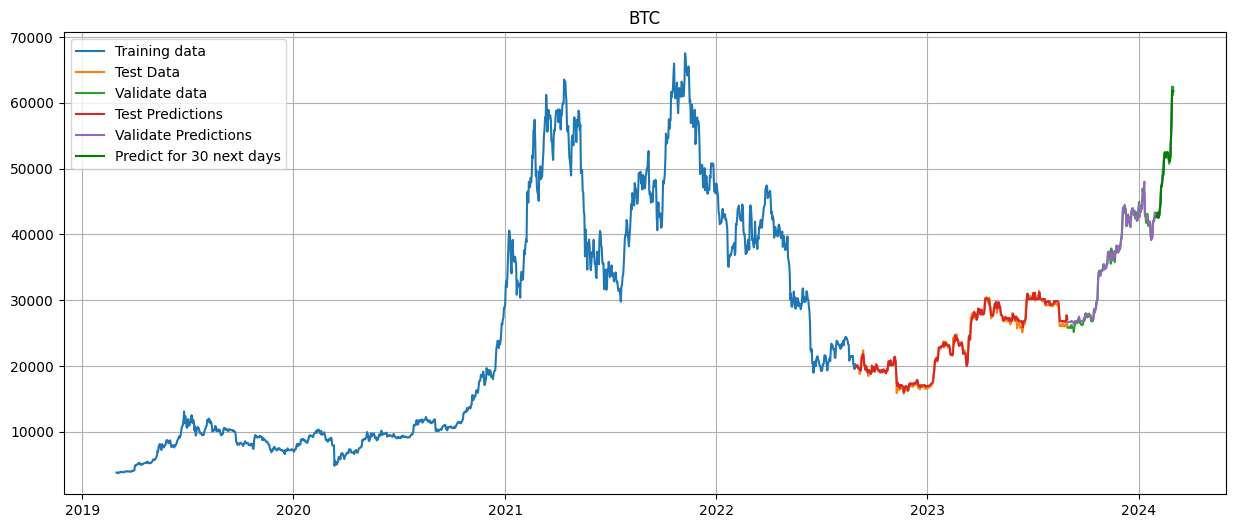

In [105]:
plt.figure(figsize=(15, 6))
plt.title(f"BTC")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, test_predictions)
plt.plot(val_data.index, val_predictions)
plt.plot(last_data, y_pred_test, color="green")
plt.legend(['Training data', 'Test Data', 'Validate data', 'Test Predictions', 'Validate Predictions', 'Predict for 30 next days'])
plt.grid(True)

plt.show()